In [3]:
import itertools
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
import sklearn as sk
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn import metrics
from sklearn import tree,svm



In [4]:
#import csv file, get dataframe dimension

In [1]:
!pip install pydotplus

Package                       Version             
----------------------------- --------------------
absl-py                       0.13.0              
aiodns                        3.0.0               
aiohttp                       3.7.4.post0         
alabaster                     0.7.12              
anaconda                      0.0.1.1             
appdirs                       1.4.4               
apturl                        0.5.2               
argon2-cffi                   20.1.0              
arrow                         1.1.1               
astroid                       2.6.2               
astunparse                    1.6.3               
async-generator               1.10                
async-timeout                 3.0.1               
atomicwrites                  1.4.0               
attrs                         21.2.0              
autopep8                      1.5.7               
Babel                         2.9.1               
backcall                      0

In [5]:
df =pd.read_csv('/home/nikki/ia/datasets/loan_train.csv')
df.head()
df.shape


(346, 10)

In [6]:
#convert due_date & effective date to datetime

In [7]:
df['due_date']=pd.to_datetime(df['due_date'])
df['effective_date']=pd.to_datetime(df['effective_date'])
df['due_date']=df['due_date'].apply(lambda x: x.toordinal())
df['effective_date']=pd.to_datetime(df['effective_date'])
df.head()


,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,736244,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,736244,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,736229,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,736245,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,736245,29,college,male


In [8]:
#count and sum loan status value

In [9]:
df['loan_status'].value_counts()


PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

In [10]:
#remplacer male, female par 0 1 =>

In [11]:
df['Gender'].replace(to_replace=['male','female'],value=[0,1],inplace=True)

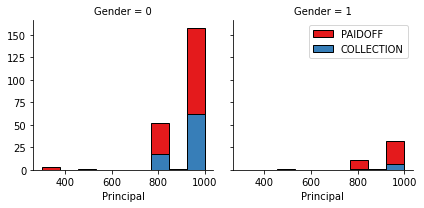

In [12]:
import seaborn as sns
bins = np.linspace(df.Principal.min(),df.Principal.max(),10)
g=sns.FacetGrid(df,col="Gender",hue="loan_status", palette="Set1",col_wrap=2)
g.map(plt.hist, 'Principal',bins=bins,ec="k")
g.axes[-1].legend()
plt.show()


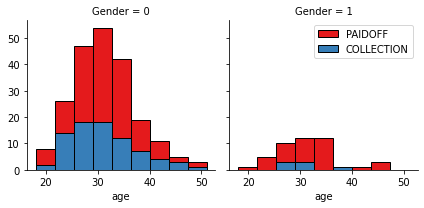

In [13]:
df['dayofweek']=df['effective_date'].dt.dayofweek
bins=np.linspace(df.age.min(),df.age.max(),10)
g=sns.FacetGrid(df,col="Gender",hue="loan_status",palette="Set1",col_wrap=2)
g.map(plt.hist,'age',bins=bins,ec="k")
g.axes[-1].legend()
plt.show()

In [14]:
df['weekend']=df['dayofweek'].apply(lambda x: 1 if (x>3) else 0)
df.head

<bound method NDFrame.head of      Unnamed: 0  Unnamed: 0.1 loan_status  Principal  terms effective_date  \
0             0             0     PAIDOFF       1000     30     2016-09-08   
1             2             2     PAIDOFF       1000     30     2016-09-08   
2             3             3     PAIDOFF       1000     15     2016-09-08   
3             4             4     PAIDOFF       1000     30     2016-09-09   
4             6             6     PAIDOFF       1000     30     2016-09-09   
..          ...           ...         ...        ...    ...            ...   
341         394           394  COLLECTION        800     15     2016-09-11   
342         395           395  COLLECTION       1000     30     2016-09-11   
343         397           397  COLLECTION        800     15     2016-09-12   
344         398           398  COLLECTION       1000     30     2016-09-12   
345         399           399  COLLECTION       1000     30     2016-09-12   

     due_date  age             ed

In [15]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)


Gender  loan_status
0       PAIDOFF        0.731293
        COLLECTION     0.268707
1       PAIDOFF        0.865385
        COLLECTION     0.134615
Name: loan_status, dtype: float64

In [16]:
Feature= df[['Principal','terms','age','Gender','due_date']]

Feature=pd.concat([Feature,pd.get_dummies(df['education'])],axis=1)
Feature.drop(['Master or Above'],axis=1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,due_date,Bechalor,High School or Below,college
0,1000,30,45,0,736244,0,1,0
1,1000,30,33,1,736244,1,0,0
2,1000,15,27,0,736229,0,0,1
3,1000,30,28,1,736245,0,0,1
4,1000,30,29,0,736245,0,0,1


In [17]:
X=Feature
X[0:5]

,Principal,terms,age,Gender,due_date,Bechalor,High School or Below,college
0,1000,30,45,0,736244,0,1,0
1,1000,30,33,1,736244,1,0,0
2,1000,15,27,0,736229,0,0,1
3,1000,30,28,1,736245,0,0,1
4,1000,30,29,0,736245,0,0,1


In [18]:
y=df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [19]:
#normalize Data
#Data Standardization gives data zero mean and unit variance
X=preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004,  0.20346575,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177,  0.20346575,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20639708,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.29745661,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.29745661,
        -0.38170062, -0.87997669,  1.14984679]])

In [20]:
#split dataset

In [21]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


In [22]:
#KNN split data beween train and test
k=4
neighbour = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
#predict
yhat = neighbour.predict(X_test)

print(yhat)
#colonnes utilisées pour prédire y
yhat[0:5]

['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'COLLECTION' 'PAIDOFF' 'PAIDOFF'
 'COLLECTION' 'COLLECTION' 'COLLECTION' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'COLLECTION' 'COLLECTION' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'COLLECTION'
 'PAIDOFF' 'PAIDOFF' 'COLLECTION' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'COLLECTION' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'COLLECTION' 'PAIDOFF' 'COLLECTION' 'COLLECTION' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'COLLECTION' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']


array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION', 'PAIDOFF'],
      dtype=object)

In [23]:
#these function are equal to jaccard_score
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neighbour.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.7753623188405797
Test set Accuracy:  0.7142857142857143


In [24]:
#train model and predict for various values of k then plot it 
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc



array([0.64285714, 0.55714286, 0.75714286, 0.71428571, 0.77142857,
       0.7       , 0.74285714, 0.7       , 0.75714286])

In [25]:
#plot the model accuracy for a different number of vzalue of k


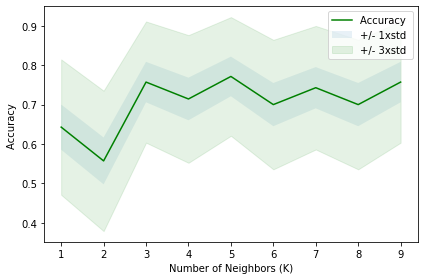

In [26]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [27]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.7714285714285715 with k= 5


In [28]:
from sklearn import tree,svm
from sklearn import preprocessing

#predictiveTree result and metrics


In [29]:
my_X=df[['Principal','terms','effective_date','age','education','Gender']]
#Education and Gender are categorical variables so we the need to convert them into dummy variables
le_educ=preprocessing.LabelEncoder()
le_educ.fit(['High School or Below','Bechalor','college','Master or Above'])
my_X.iloc[:,4]=le_educ.transform(my_X.iloc[:,4])
print(my_X)


     Principal  terms effective_date  age  education  Gender
0         1000     30     2016-09-08   45          1       0
1         1000     30     2016-09-08   33          0       1
2         1000     15     2016-09-08   27          3       0
3         1000     30     2016-09-09   28          3       1
4         1000     30     2016-09-09   29          3       0
..         ...    ...            ...  ...        ...     ...
341        800     15     2016-09-11   32          1       0
342       1000     30     2016-09-11   25          1       0
343        800     15     2016-09-12   39          3       0
344       1000     30     2016-09-12   28          3       0
345       1000     30     2016-09-12   26          3       0

[346 rows x 6 columns]


/home/nikki/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [30]:
from sklearn.model_selection import train_test_split
#setting up decision tree train test split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)


In [31]:
#Modeling DecisionTreeClassifier called loanTree
#inside classifier, cirterion=entropy => information gain of each node
from sklearn.tree import DecisionTreeClassifier
loanTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
loanTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [32]:
loanTree.fit(X_trainset,y_trainset)
predTree=loanTree.predict(X_testset)
print(predTree [0:5])
print(y_testset [0:5])

['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']
['PAIDOFF' 'PAIDOFF' 'COLLECTION' 'COLLECTION' 'PAIDOFF']


In [33]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.7115384615384616


In [34]:
#Visualize the Tree
import io 
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
import pandas as pd


ModuleNotFoundError: No module named 'pydotplus'

In [44]:
df =pd.read_csv('/home/nikki/ia/datasets/loan_train.csv')

my_X=df[['Principal','terms','effective_date','age','education','Gender']]

dot_data = io.StringIO()
filename = "loantree.png"
featureNames = my_X.columns[0:8]
out=tree.export_graphviz(loanTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

ValueError: Length of feature_names, 6 does not match number of features, 8

In [45]:
SVM value

SyntaxError: invalid syntax (<ipython-input-45-5d254a3853cb>, line 1)

In [54]:

from sklearn import svm
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

#myls=df['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'],value=[0,1],inplace=True)
clf = svm.SVC(kernel='rbf')
clf.fit(X_trainset, y_trainset) 
yhat = clf.predict(X_testset)
yhat [0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

metrics value for svm: f1_score


In [56]:
from sklearn.metrics import f1_score
f1_score(y_testset, yhat, average='weighted') 

0.6299405014874628

Plot confusion matrix to visualize

In [55]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [7]:
#normalize => dummy

Confusion matrix, without normalization
None


TypeError: Image data of dtype object cannot be converted to float

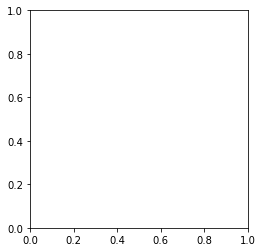

In [39]:
# Compute confusion matrix
#cnf_matrix = plot_confusion_matrix(y_test, yhat, labels=[1,2])
nf_matrix = plot_confusion_matrix(y_test, yhat)
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['PAIDOFF(1)','COLLECTION(2)'],normalize= False,  title='Confusion matrix loan')

In [9]:
#metrics
